In [23]:
import pandas as pd
from matplotlib import pyplot as plt

In [24]:
# read data
data = pd.read_csv("./data/data.csv",delimiter=";")
#print(data)

In [25]:
# splitting data into two dataframes by column AB_Cohort
# Разделение данных на два DataFrame по значению столбца "AB_Cohort"
data_cohort_A = data[data['AB_Cohort'] == 'A']
data_cohort_B = data[data['AB_Cohort'] == 'B']

# Сохранение двух DataFrame в файлы CSV
data_cohort_A.to_csv("./data_proc/data_cohort_A.csv", index=False)
data_cohort_B.to_csv("./data_proc/data_cohort_B.csv", index=False)

In [26]:
#1.1 Conversion rate

# Функция для расчета Conversion Rate
def calculate_conversion_rate(data):
    conversion_rates = []

    for day in range(1, 8):
        day_data = data[data['Retention'] == day]
        users_with_purchase = day_data[day_data['CountBuy'] > 0]['User_id'].nunique()
        total_users = day_data['User_id'].nunique()

        conversion_rate = (users_with_purchase / total_users) * 100 if total_users > 0 else 0
        conversion_rates.append(conversion_rate)

    return conversion_rates

# Вычисляем Conversion Rate для когорты A и B
conversion_rate_cohort_A = calculate_conversion_rate(data_cohort_A)
conversion_rate_cohort_B = calculate_conversion_rate(data_cohort_B)

# Дни (1-7)
days = range(1, 8)



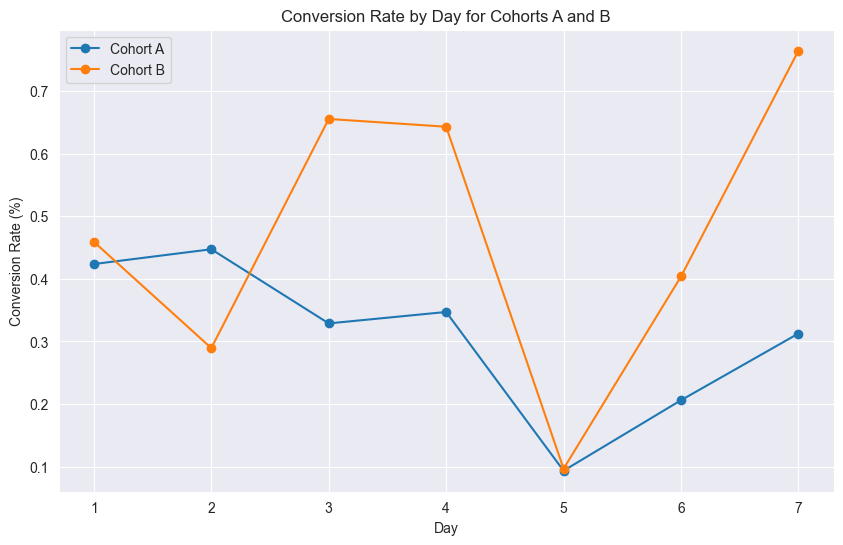

In [27]:
#1.2 Conversion rate graph
# Строим график Conversion Rate для когорт A и B
plt.figure(figsize=(10, 6))
plt.plot(days, conversion_rate_cohort_A, label='Cohort A', marker='o')
plt.plot(days, conversion_rate_cohort_B, label='Cohort B', marker='o')

plt.title('Conversion Rate by Day for Cohorts A and B')
plt.xlabel('Day')
plt.ylabel('Conversion Rate (%)')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()


In [28]:
# 2.1 Average level and average day of life at which purchases are made
# Функция для вычисления среднего уровня и среднего дня жизни, на котором совершаются покупки
def calculate_avg_level_and_day(data):
    cohort_data_with_purchase = data[data['CountBuy'] > 0]

    avg_level = cohort_data_with_purchase['MaxLevelPassed'].mean()
    avg_day = cohort_data_with_purchase['Retention'].mean()

    return avg_level, avg_day

# Вычисляем средний уровень и средний день жизни для когорты A и B с покупками
avg_level_cohort_A, avg_day_cohort_A = calculate_avg_level_and_day(data_cohort_A)
avg_level_cohort_B, avg_day_cohort_B = calculate_avg_level_and_day(data_cohort_B)




In [29]:

# 2.1 Average level and average day of life at which purchases are made
# Функция для вычисления среднего уровня и среднего дня жизни, на котором совершаются первые покупки
def calculate_avg_level_and_day(data):
    cohort_data_with_purchase = data[data['CountBuy'] > 0]

    # Группируем данные по User_id, затем находим первый день жизни и первый уровень, на котором совершается покупка
    first_purchase_data = cohort_data_with_purchase.groupby('User_id').first()

    avg_level = first_purchase_data['MaxLevelPassed'].mean()
    avg_day = first_purchase_data['Retention'].mean()

    return avg_level, avg_day

# Вычисляем средний уровень и средний день жизни для когорты A и B с покупками
avg_level_cohort_A, avg_day_cohort_A = calculate_avg_level_and_day(data_cohort_A)
avg_level_cohort_B, avg_day_cohort_B = calculate_avg_level_and_day(data_cohort_B)


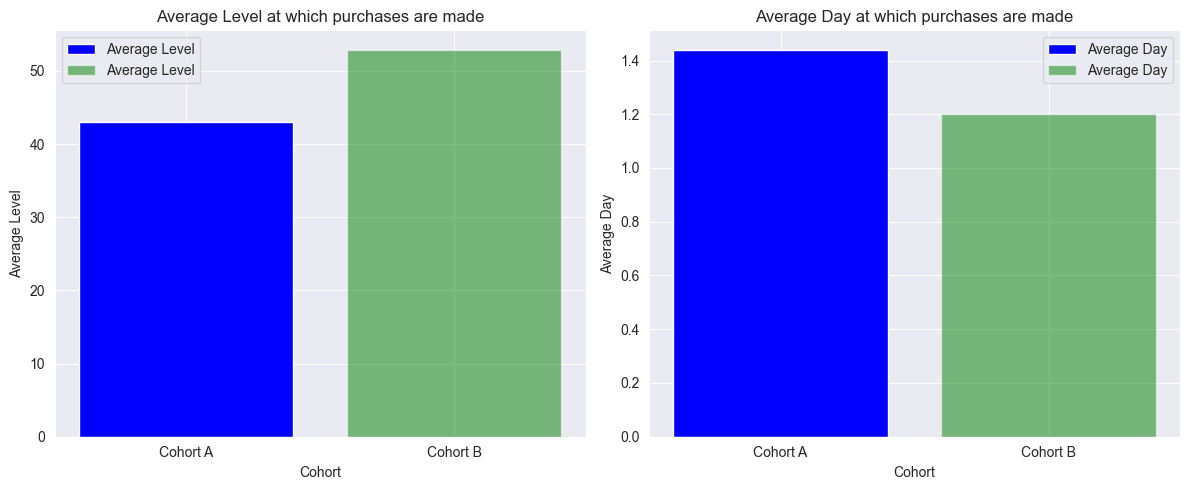

In [30]:
# 2.2 Average level and average day of life at which purchases are made graph
# Графики для среднего уровня и среднего дня
plt.figure(figsize=(12, 5))

# График для среднего уровня
plt.subplot(1, 2, 1)
plt.bar(['Cohort A'], avg_level_cohort_A, color='blue', label='Average Level')
plt.bar(['Cohort B'], avg_level_cohort_B, color='green', label='Average Level', alpha=0.5)
plt.title('Average Level at which purchases are made')
plt.xlabel('Cohort')
plt.ylabel('Average Level')
plt.legend()

# График для среднего дня
plt.subplot(1, 2, 2)
plt.bar(['Cohort A'], avg_day_cohort_A, color='blue', label='Average Day')
plt.bar(['Cohort B'], avg_day_cohort_B, color='green', label='Average Day', alpha=0.5)
plt.title('Average Day at which purchases are made')
plt.xlabel('Cohort')
plt.ylabel('Average Day')
plt.legend()

plt.tight_layout()
plt.show()

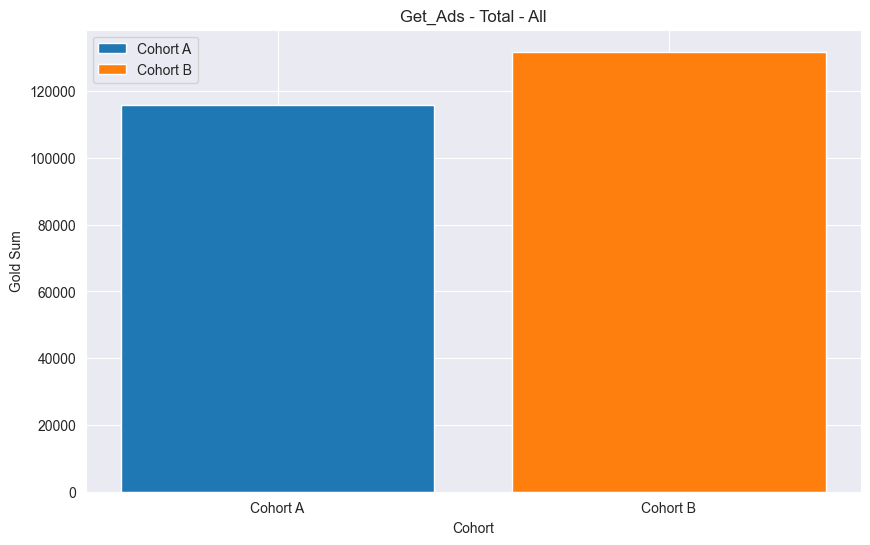

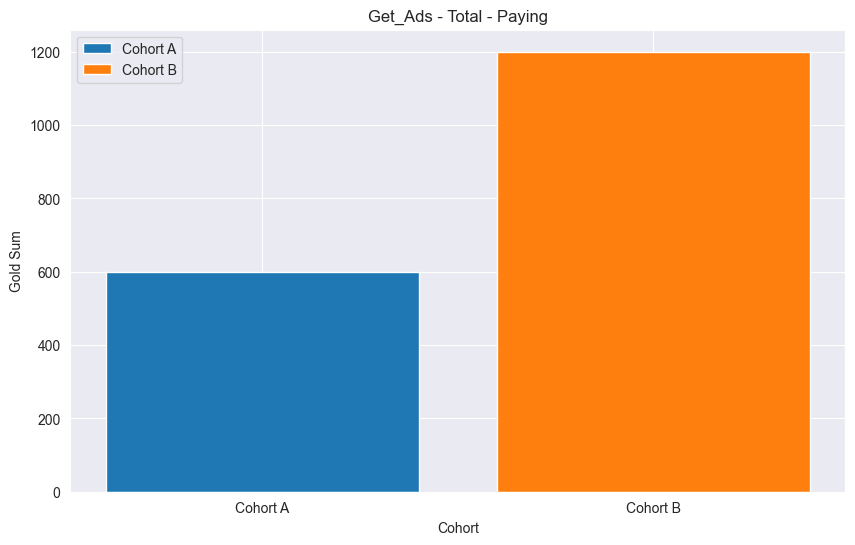

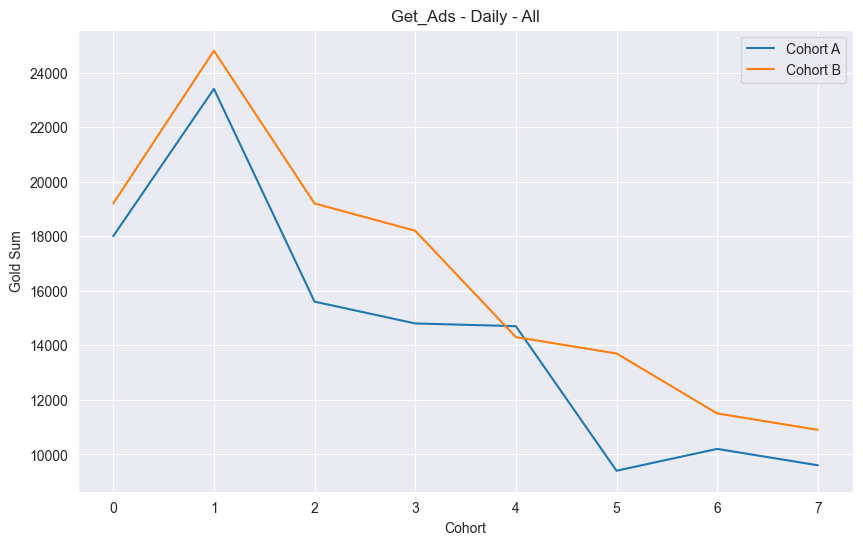

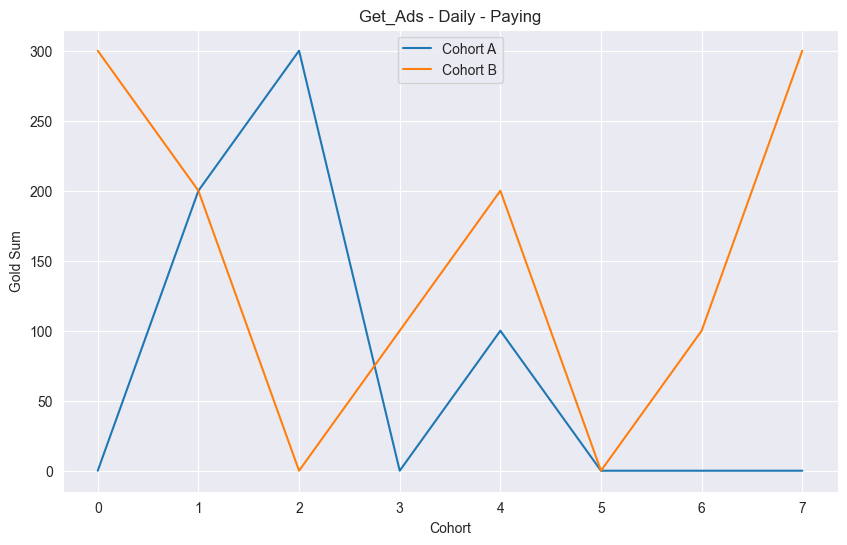

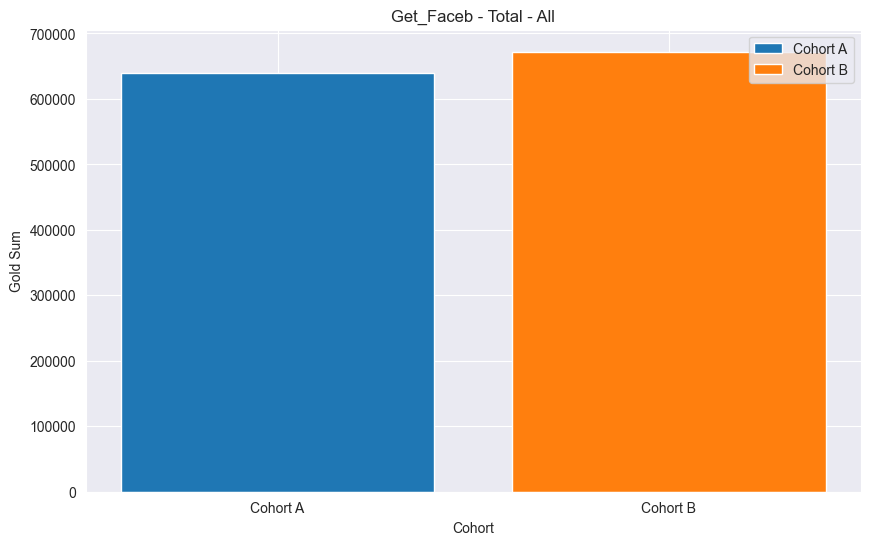

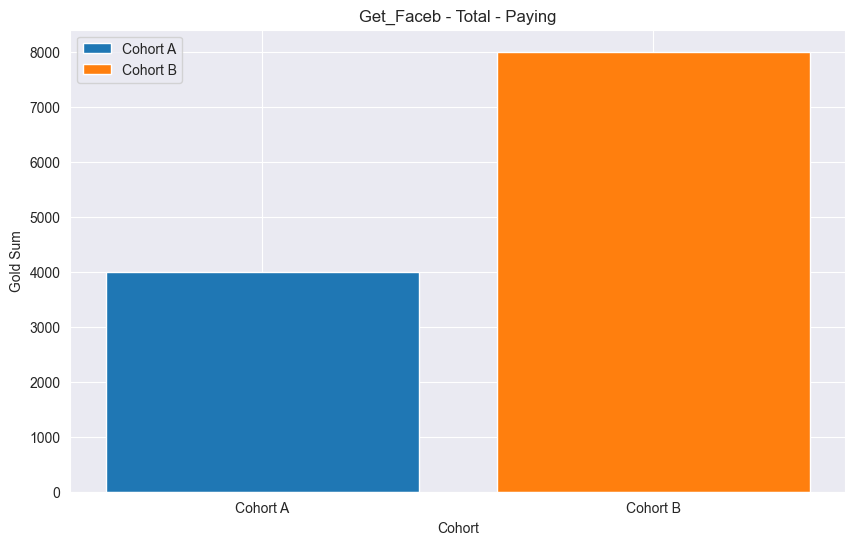

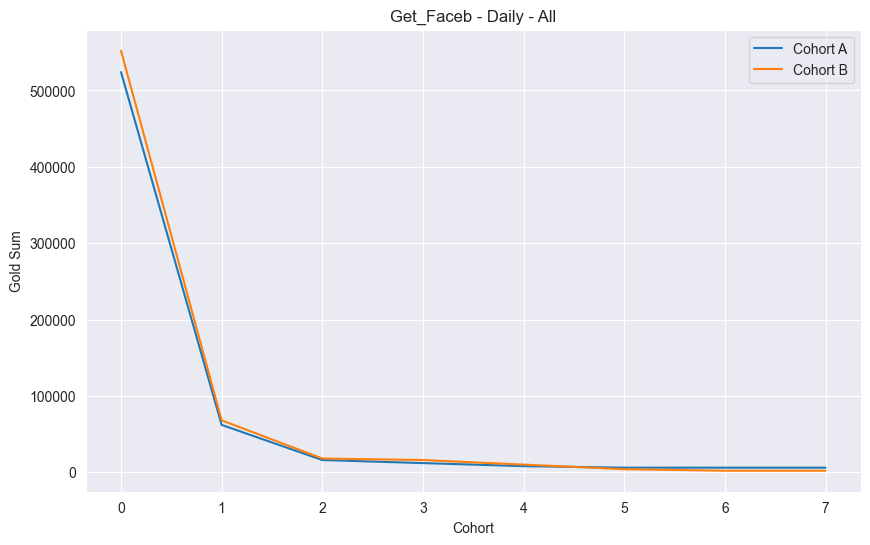

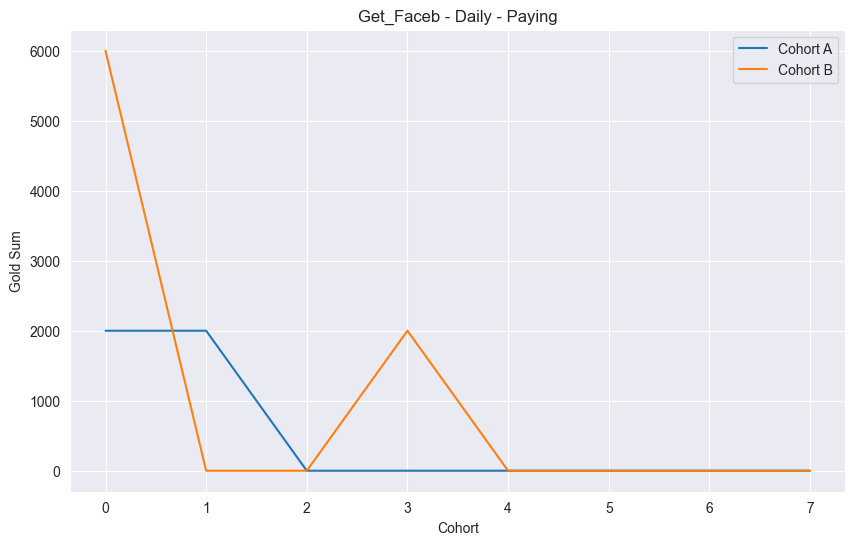

In [31]:
# 3 Amount of gold received for Facebook and advertising

days = data['Retention'].unique()

# Список признаков для анализа
features = ['Get_Ads', 'Get_Faceb']

# Разбейте данные по когортам A и B
# написано выше

# Постройте 8 графиков
for feature in features:
    for days_type in ['Total', 'Daily']:
        for player_type in ['All', 'Paying']:
            plt.figure(figsize=(10, 6))
            for cohort in ['A', 'B']:
                filtered_data = data_cohort_A if cohort == 'A' else data_cohort_B

                if player_type == 'Paying':
                    filtered_data = filtered_data[filtered_data['CountBuy'] > 0]

                if days_type == 'Daily':
                    gold_sum = filtered_data.groupby(['Retention', 'AB_Cohort'])[feature].sum().reset_index()
                    plt.plot(gold_sum['Retention'], gold_sum[feature], label=f'Cohort {cohort}')
                else:
                    gold_sum = filtered_data.groupby(['AB_Cohort'])[feature].sum().reset_index()
                    plt.bar([f'Cohort {cohort}'], gold_sum[feature], label=f'Cohort {cohort}')

            plt.title(f'{feature} - {days_type} - {player_type}')
            plt.xlabel('Cohort')
            plt.ylabel('Gold Sum')
            plt.legend()
            plt.grid(True)
            plt.show()


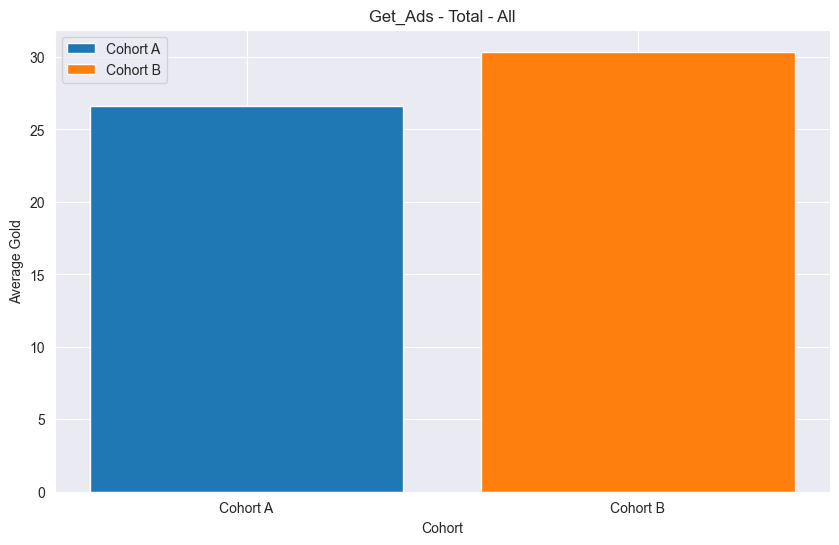

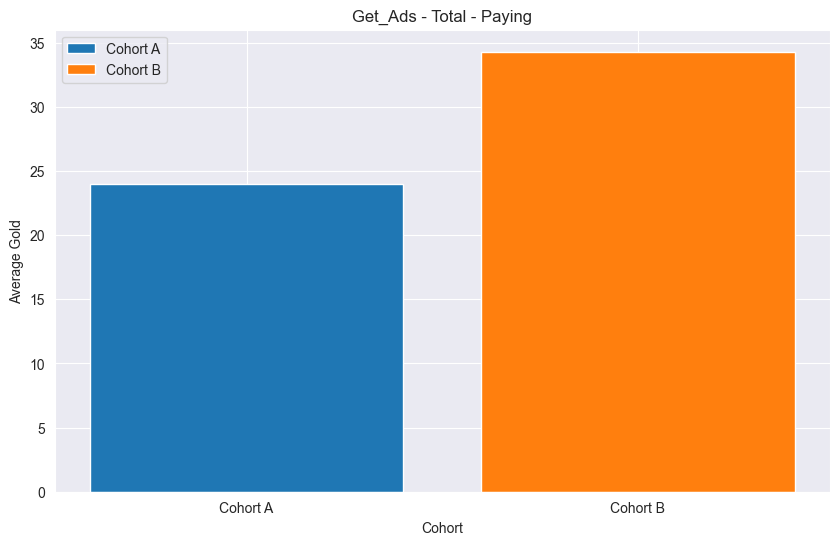

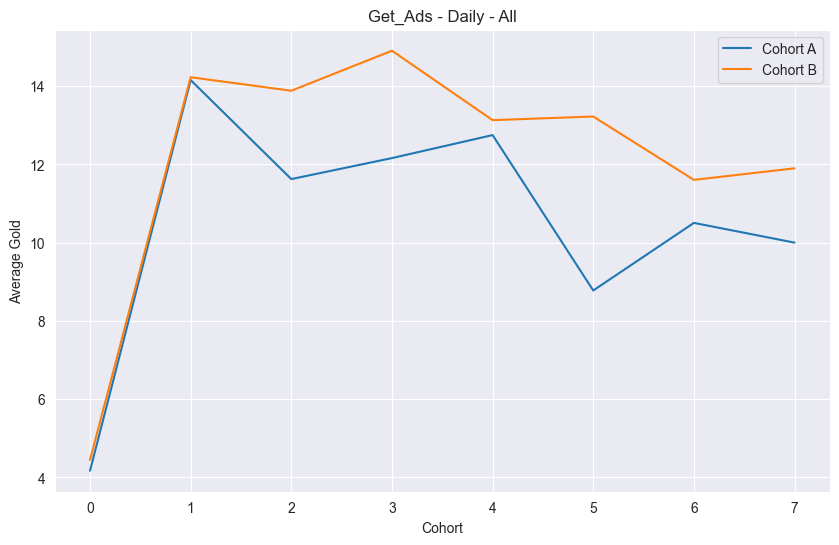

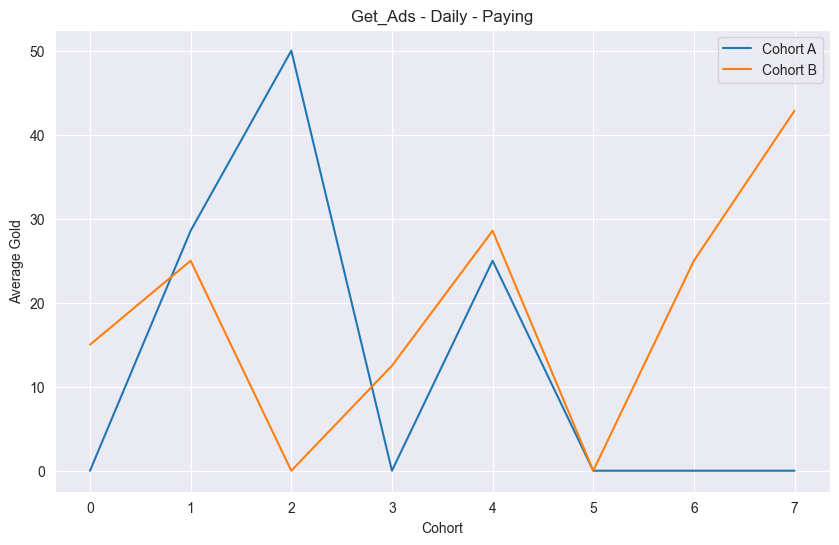

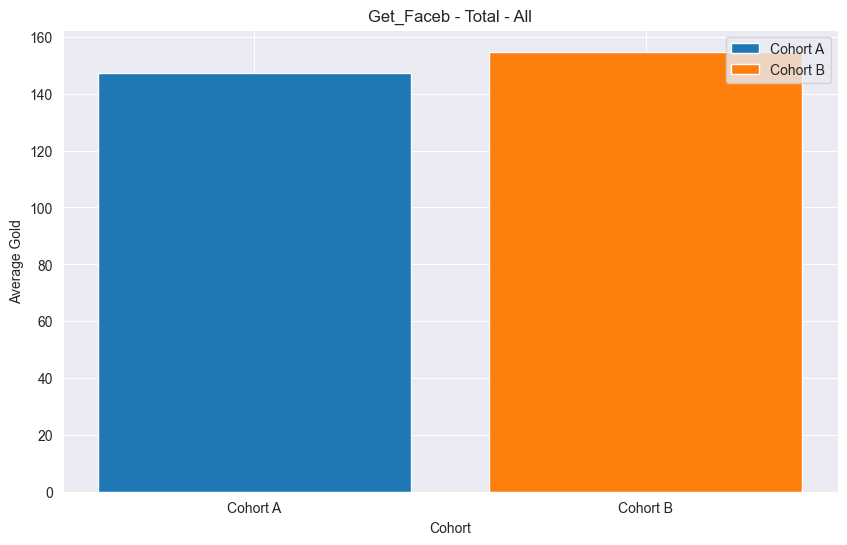

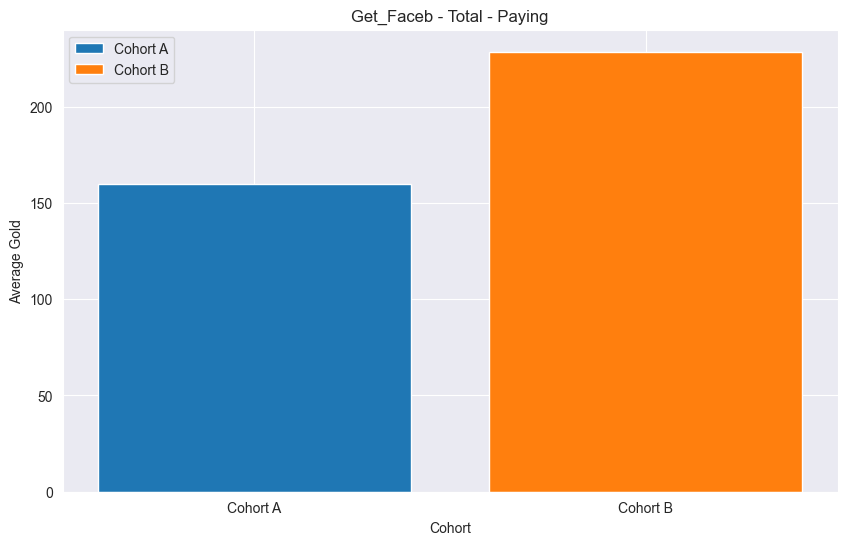

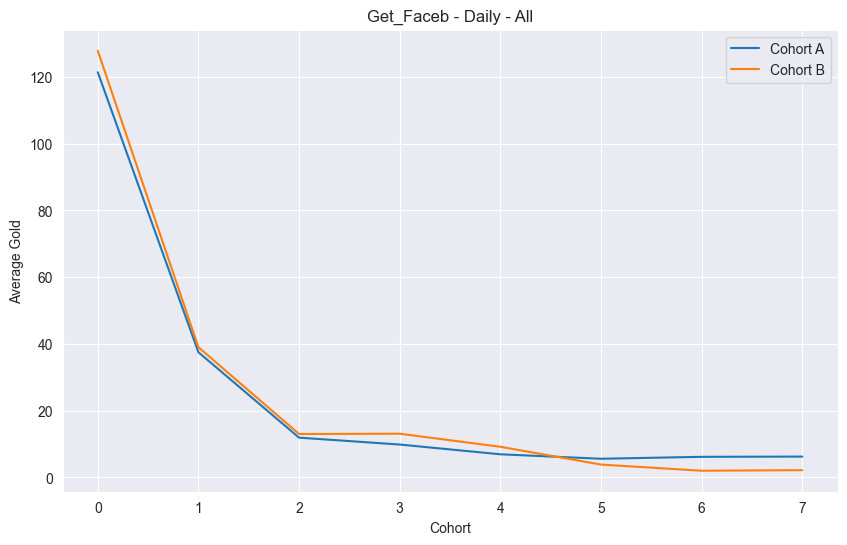

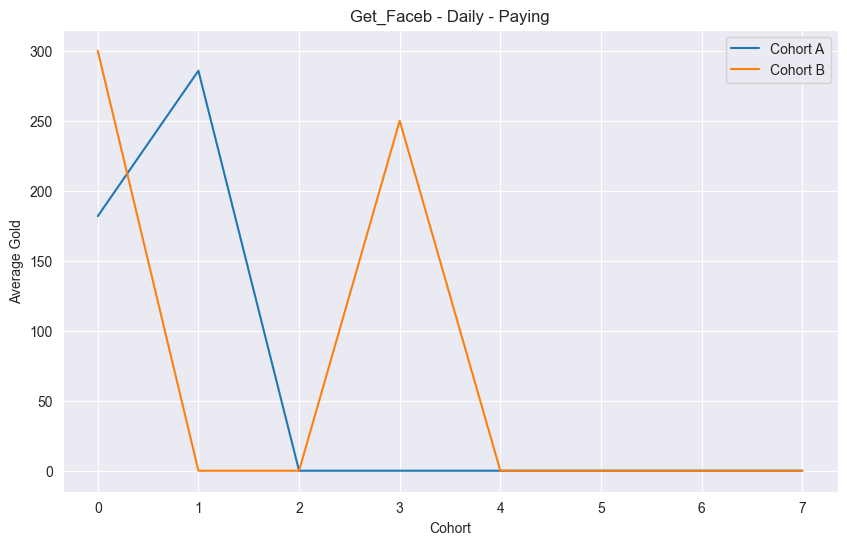

In [33]:
#3 new
# Список признаков для анализа
features = ['Get_Ads', 'Get_Faceb']

# Постройте 8 графиков
for feature in features:
    for days_type in ['Total', 'Daily']:
        for player_type in ['All', 'Paying']:
            plt.figure(figsize=(10, 6))
            for cohort in ['A', 'B']:
                filtered_data = data_cohort_A if cohort == 'A' else data_cohort_B

                if player_type == 'Paying':
                    filtered_data = filtered_data[filtered_data['CountBuy'] > 0]

                if days_type == 'Daily':
                    gold_sum_daily = filtered_data.groupby(['Retention', 'User_id'])[feature].sum().reset_index()
                    gold_mean_daily = gold_sum_daily.groupby(['Retention'])[feature].mean().reset_index()
                    plt.plot(gold_mean_daily['Retention'], gold_mean_daily[feature], label=f'Cohort {cohort}')
                else:
                    gold_sum_total = filtered_data.groupby(['User_id'])[feature].sum().reset_index()
                    gold_mean_total = gold_sum_total[feature].mean()
                    plt.bar([f'Cohort {cohort}'], [gold_mean_total], label=f'Cohort {cohort}')

            plt.title(f'{feature} - {days_type} - {player_type}')
            plt.xlabel('Cohort')
            plt.ylabel('Average Gold')
            plt.legend()
            plt.grid(True)
            plt.show()

